In [1]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import numpy as np  # Import NumPy for numerical operations
import pandas as pd  # Import Pandas for data manipulation
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for enhanced plotting capabilities
from sklearn.cluster import KMeans  # Import KMeans from scikit-learn for clustering
from sklearn.preprocessing import StandardScaler  # Import StandardScaler from scikit-learn for data scaling

In [3]:
from sklearn.cluster import AgglomerativeClustering  # Import AgglomerativeClustering for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage  # Import dendrogram and linkage for visualizing hierarchical clustering results

In [4]:
# Load the dataset (Mall Customer Segmentation Data)

df = pd.read_csv("Credit_card_dataset.csv")

# Inspect the first few rows of the dataset to understand its structure
df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [5]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [7]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


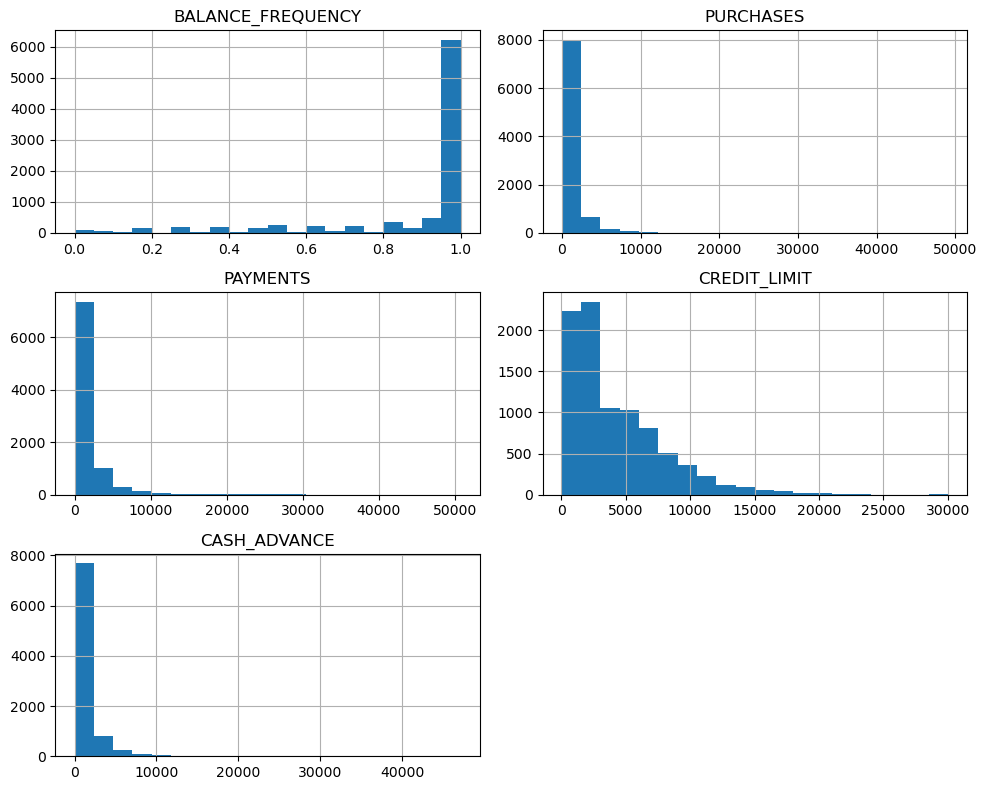

In [8]:
# Plot histograms for all numeric columns
df[['BALANCE_FREQUENCY', 'PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

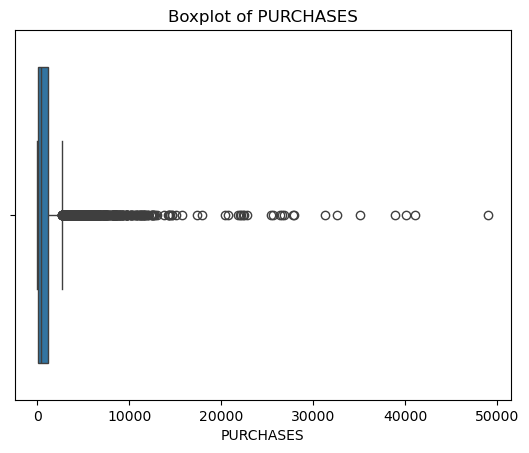

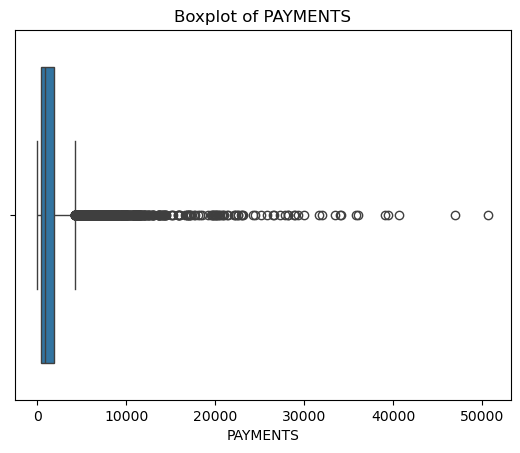

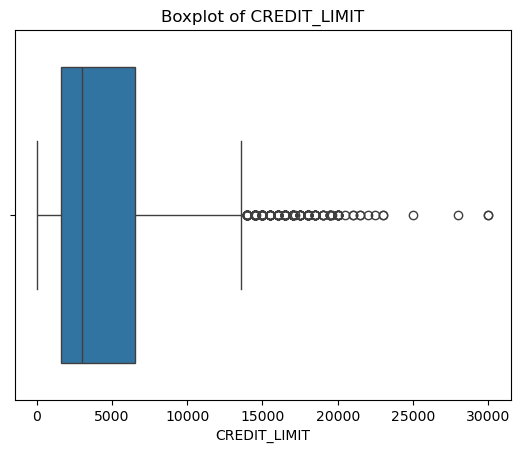

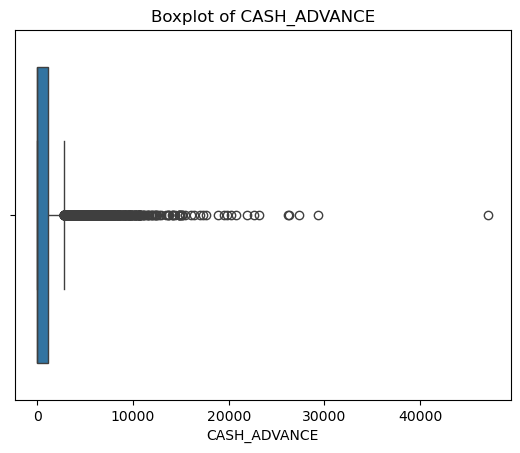

In [9]:
# Boxplots for each column
for col in ['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT', 'CASH_ADVANCE']:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


In [5]:
# Calculate the median of CREDIT_LIMIT
credit_limit_median = df['CREDIT_LIMIT'].median()

# Replace missing values with the median
df['CREDIT_LIMIT'].fillna(credit_limit_median, inplace=True)

# Verify if there are any missing values left
print("Missing values after replacement:\n", df.isnull().sum())


Missing values after replacement:
 CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64


Extract relevant features for clustering

In [6]:
X = df[['PURCHASES', 'CREDIT_LIMIT']]


In [7]:
scaler = StandardScaler()  # Initialize the StandardScaler to standardize the features by removing the mean and scaling to unit variance
X_scaled = scaler.fit_transform(X)  # Fit the scaler to the data and then transform the features, returning the standardized version of the dataset 'X'

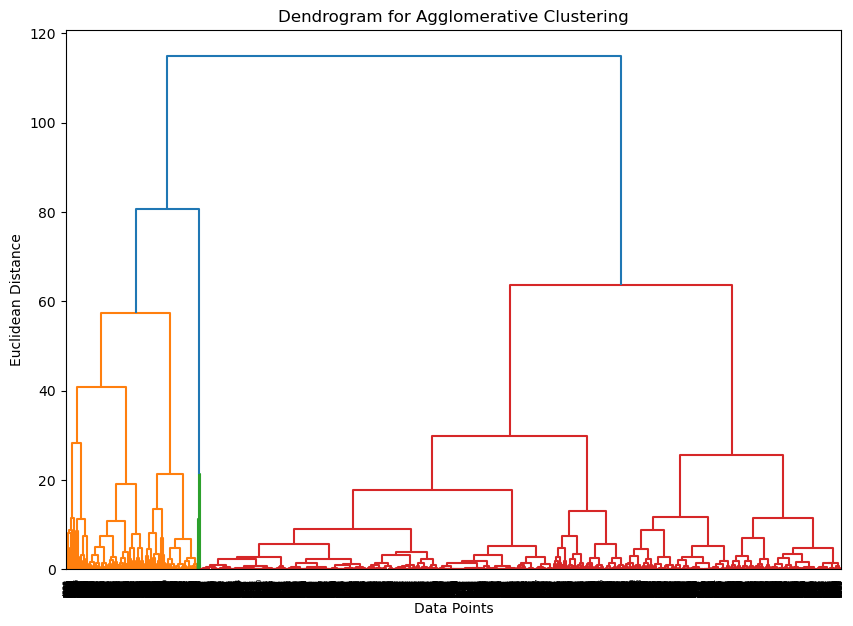

In [8]:
linked = linkage(X_scaled, method='ward')
# Create a new figure with a specific size for the dendrogram
plt.figure(figsize=(10, 7))

# Plot the dendrogram using the linkage matrix (linked), where:
# - orientation='top' means the root of the dendrogram will be at the top.
# - distance_sort='descending' sorts clusters by descending distances between them.
# - show_leaf_counts=True will display the number of points in each cluster.
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

# Add a title to the plot to describe it as a dendrogram for agglomerative clustering
plt.title('Dendrogram for Agglomerative Clustering')

# Label the x-axis as 'Data Points' since the horizontal axis represents the individual data points or clusters
plt.xlabel('Data Points')

# Label the y-axis as 'Euclidean Distance' because the vertical axis represents the distance between merged clusters
plt.ylabel('Euclidean Distance')

# Display the plot
plt.show()

In [15]:
# Perform agglomerative clustering with the following parameters:
# - n_clusters=5: Specifies that we want to group the data into 5 clusters.
# - metric='euclidean': Specifies that the Euclidean distance will be used to measure the similarity between data points.
# - linkage='ward': Specifies that Ward’s method will be used to minimize the variance within clusters when merging them.
agglom = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

In [16]:
# Fit and predict the clusters
clusters = agglom.fit_predict(X_scaled)

In [17]:
# Add cluster labels to the original dataset
df['Cluster'] = clusters

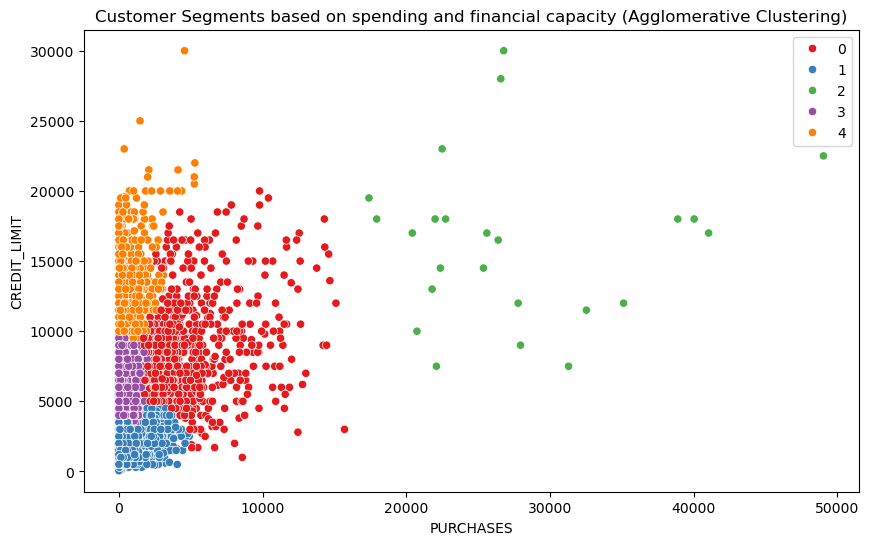

In [18]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments based on spending and financial capacity (Agglomerative Clustering)')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

# Assuming you have your features stored in X and the cluster labels in labels
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.4654


 Identify Cluster Characteristics
You can calculate the mean values for each cluster to understand their behavior:

In [20]:
# Calculate the mean for each cluster
cluster_summary = df.groupby('Cluster')[['PURCHASES', 'CREDIT_LIMIT']].mean()
print(cluster_summary)

            PURCHASES  CREDIT_LIMIT
Cluster                            
0         4454.033378   8178.167582
1          538.029929   1967.711319
2        27690.865833  16333.333333
3          488.560641   5992.648867
4          752.247687  12592.264753


INTEPRETATION
Cluster 0 - Moderate Spenders, High Credit - Customers with moderate spending and decent credit limits. Likely responsible users
Cluster 1 -	Low Spenders, Low Credit - Customers with very low purchases and limited credit access. Possibly new or inactive users.
Cluster 2 -	High Spenders, High Credit - Premium customers with high spending and high credit limits. Likely VIP customers.
Cluster 3 - Low Spenders, Moderate Credit - Customers with very low spending despite having a moderate credit limit. Possibly inactive or cautious users.
Cluster 4 - Low Spenders, High Credit - Customers with high credit but low spending. Could be potential high-value customers if engaged.

K MEANS CLUSTERING

  File "C:\Users\Special User\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


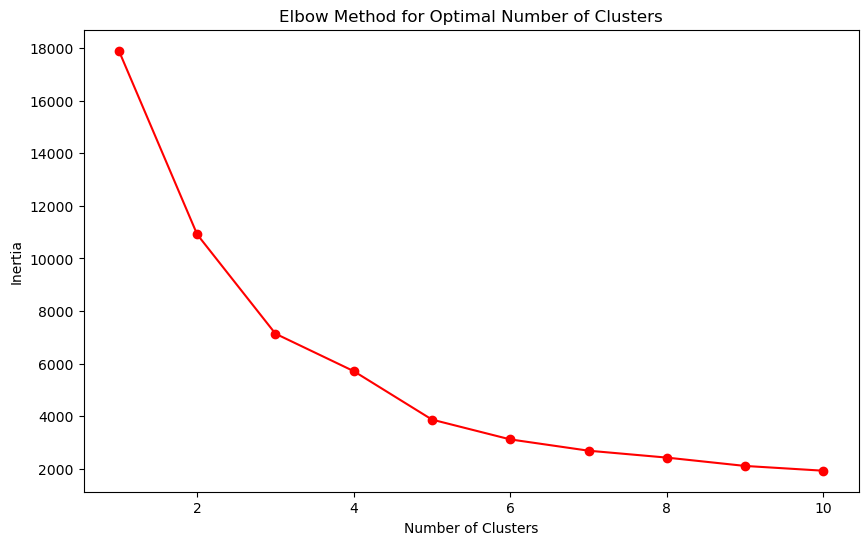

In [20]:
inertia_list = []  # List to store the inertia values for each number of clusters

for i in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)  # Initialize KMeans with the current number of clusters (i)
    kmeans.fit(X_scaled)  # Fit the KMeans model on the standardized data
    inertia_list.append(kmeans.inertia_)  # Append the inertia (sum of squared distances) to the list

# Plot the Elbow curve
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(range(1, 11), inertia_list, 'ro-')  # Plot the number of clusters against inertia with red markers and lines
# 'r': Specifies the color of the plot, in this case, red (r stands for red).
# 'o': Specifies the marker style, which in this case is a circle (o).
# '-': Specifies the line style, which in this case is a solid line (-).

plt.title('Elbow Method for Optimal Number of Clusters')  # Add a title to the plot
plt.xlabel('Number of Clusters')  # Label the x-axis as 'Number of Clusters'
plt.ylabel('Inertia')  # Label the y-axis as 'Inertia' (within-cluster sum of squares)
plt.show()  # Display the plot

In [21]:
inertia_list

[17899.99999999999,
 10913.86805283705,
 7138.500596063379,
 5714.402237224419,
 3871.5262037105467,
 3118.362221960351,
 2688.968496451368,
 2426.4436486774557,
 2109.1936162824277,
 1927.5298457420504]

In [22]:
# Fit K-Means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)  # Initialize the KMeans algorithm with 5 clusters and a fixed random state for reproducibility
kmeans.fit(X_scaled)  # Fit the KMeans model to the standardized data

KMeans(n_clusters=5, random_state=42)

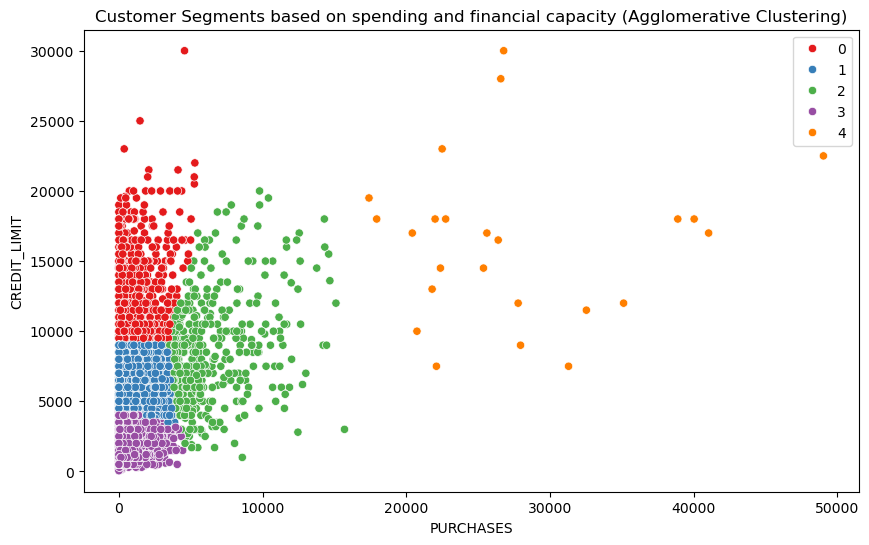

In [23]:
df['Cluster'] = kmeans.labels_  # Assign the cluster labels from the KMeans model to a new column 'Cluster' in the dataset

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.scatterplot(x=df['PURCHASES'], y=df['CREDIT_LIMIT'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments based on spending and financial capacity (Agglomerative Clustering)')
plt.xlabel('PURCHASES')
plt.ylabel('CREDIT_LIMIT')
plt.legend()
plt.show()

THERE ISNT MUCH DIFFERNCE BETWEEN THE SEGREGATION OF HIERARICHAL AND KMEANS 
Key Insights 
(High Spenders, High Credit) – 

These are the most valuable customers.

Offer exclusive rewards, personalized experiences, and premium services.

Encourage referrals as these customers may bring in high-value clients.

 (Low Spenders, High Credit) –

These customers have high credit limits but are not utilizing them effectively.

Implement targeted marketing campaigns to encourage usage.

Offer personalized discounts or promotions based on past spending patterns.

(Moderate Spenders, High Credit) – 
Maintain their engagement by offering loyalty programs and cashback incentives.

These users can be encouraged to increase spending with seasonal promotions.

(Low Spenders, Low Credit) – 

This group has minimal activity and low credit limits.

Consider welcome bonuses, introductory offers, or educational content to drive engagement.

Small credit limit increases may encourage spending.

 (Low Spenders, Moderate Credit) – 

These users have a reasonable credit limit but do not spend much.

Reactivation strategies: Offer limited-time discounts or credit rewards for usage.

Consider an email or SMS marketing campaign to encourage spending.
